In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    country = citipy.nearest_city(coordinate[0], coordinate[1]).country_code
    #print(coordinate)
    #print(coordinate[0],coordinate[1])
    #print(city)
    #print(country)
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
#print("Beginning Data Retrieval     ")
#print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

#    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
#    print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c4b8c45157cffb506a8fb74d93ce2b1


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)
    # Add 1 to the record count.
    record_count += 1
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    city_weather = requests.get(city_url).json()
   

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
   
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | mount isa
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | santa isabel do rio negro
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | svetlogorsk
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | podbelsk
City not found. Skipping...
Processing Record 18 of Set 1 | nouadhibou
Processing Record 19 of Set 1 | awjilah
Processing Record 20 of Set 1 | castelnaudary
Processing Record 21 of Set 1 | rivadavia
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | odweyne
Processing Record 24 of Set 1 | atuona
Pr

Processing Record 40 of Set 4 | milkovo
Processing Record 41 of Set 4 | kamaishi
Processing Record 42 of Set 4 | alexandria
Processing Record 43 of Set 4 | avarua
Processing Record 44 of Set 4 | beyneu
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | laguna
Processing Record 47 of Set 4 | zhanaozen
Processing Record 48 of Set 4 | lulea
Processing Record 49 of Set 4 | dzhusaly
City not found. Skipping...
Processing Record 50 of Set 4 | nikolskoye
Processing Record 51 of Set 4 | kavieng
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | iquitos
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | tubruq
City not found. Skipping...
Processing Record 6 of Set 5 | vila franca do campo
Processing Record 7 of Set 5 | bajil
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set 5 | puerto ayora
Processing Record 10 of Set 5 | phu ly
Processing Record 11 of Set 5 | kinston
Processing Record 12 of Set 5 | touros
Processing R

Processing Record 31 of Set 8 | mazatlan
Processing Record 32 of Set 8 | akyab
Processing Record 33 of Set 8 | abakaliki
Processing Record 34 of Set 8 | pavlodar
Processing Record 35 of Set 8 | yialos
City not found. Skipping...
Processing Record 36 of Set 8 | balvi
Processing Record 37 of Set 8 | buin
Processing Record 38 of Set 8 | george
Processing Record 39 of Set 8 | gat
Processing Record 40 of Set 8 | kaniama
Processing Record 41 of Set 8 | sioux lookout
Processing Record 42 of Set 8 | ayabaca
Processing Record 43 of Set 8 | zhigansk
Processing Record 44 of Set 8 | harbour breton
Processing Record 45 of Set 8 | santa rosa
Processing Record 46 of Set 8 | matagami
Processing Record 47 of Set 8 | el retorno
Processing Record 48 of Set 8 | jalu
Processing Record 49 of Set 8 | parana
Processing Record 50 of Set 8 | ulladulla
Processing Record 51 of Set 8 | deputatskiy
Processing Record 2 of Set 9 | chagda
City not found. Skipping...
Processing Record 3 of Set 9 | thinadhoo
Processing 

Processing Record 25 of Set 12 | hami
Processing Record 26 of Set 12 | west wendover
Processing Record 27 of Set 12 | aksu
Processing Record 28 of Set 12 | khorixas
Processing Record 29 of Set 12 | lolua
City not found. Skipping...
Processing Record 30 of Set 12 | cheremshanka
Processing Record 31 of Set 12 | manaure
Processing Record 32 of Set 12 | luba
Processing Record 33 of Set 12 | dakoro
Processing Record 34 of Set 12 | nakusp
Processing Record 35 of Set 12 | weiswampach
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,68.49,53,100,0.65,NZ,2022-01-02 21:36:47
1,Punta Arenas,-53.1500,-70.9167,48.31,49,40,33.38,CL,2022-01-02 21:37:18
2,Busselton,-33.6500,115.3333,58.05,87,64,11.79,AU,2022-01-02 21:36:49
3,Rikitea,-23.1203,-134.9692,77.29,72,19,8.68,PF,2022-01-02 21:34:19
4,Bluff,-46.6000,168.3333,68.81,74,100,1.12,NZ,2022-01-02 21:36:53
5,Bredasdorp,-34.5322,20.0403,63.28,77,100,2.30,ZA,2022-01-02 21:34:12
6,Mount Isa,-20.7333,139.5000,83.97,70,100,9.22,AU,2022-01-02 21:32:29
7,Butaritari,3.0707,172.7902,80.82,66,100,10.54,KI,2022-01-02 21:37:17
8,Khatanga,71.9667,102.5000,-51.52,99,63,3.87,RU,2022-01-02 21:38:45
9,Ushuaia,-54.8000,-68.3000,40.66,70,75,33.38,AR,2022-01-02 21:33:36


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

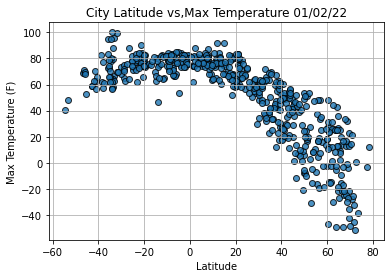

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
#Incorporate the othe rgraph properties.
plt.title(f"City Latitude vs,Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

    # Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


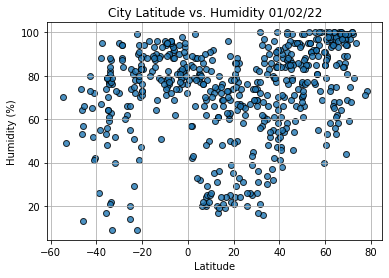

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


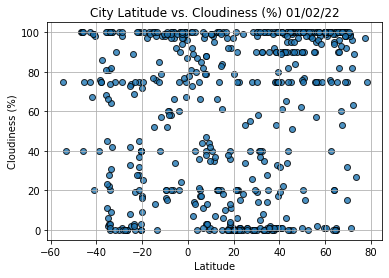

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

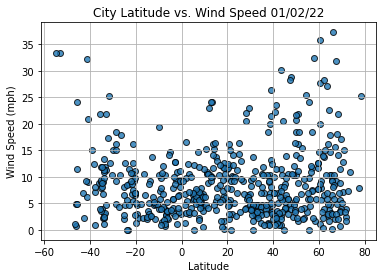

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()